# <div style="color:#fff;display:fill;border-radius:10px;background-color:#004F98;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">Data Wrangling</div>

## <span style='color:#2E8BC0'> 0| Import Libraries</span>

In [50]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## <span style='color:#2E8BC0'> 1| Read & Exploration of Data</span>

In [51]:
dataset = pd.read_csv('hour.csv')
df = dataset.copy()
df.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [52]:
df.shape

(17379, 17)

In [53]:
df_bikes = df.drop(['index','date','casual','registered'],axis=1)
df_bikes.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [54]:
df_bikes.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

In [55]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   year        17379 non-null  int64  
 2   month       17379 non-null  int64  
 3   hour        17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weather     17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  humidity    17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  demand      17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


In [56]:
df_bikes.describe()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


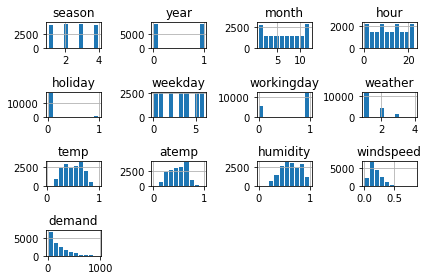

In [57]:
df_bikes.hist(rwidth=0.8)
plt.tight_layout()

## <span style='color:#2E8BC0'> 2| Data Visualization </span>

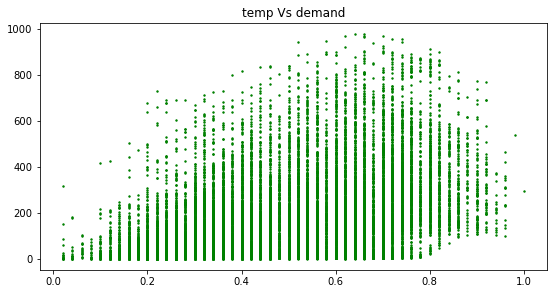

In [58]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('temp Vs demand')
plt.scatter(df_bikes['temp'], df_bikes['demand'],s=2,c='g')

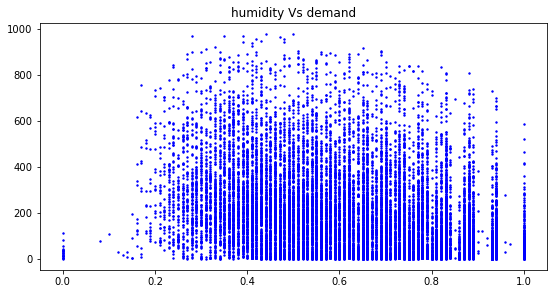

In [59]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('humidity Vs demand')
plt.scatter(df_bikes['humidity'], df_bikes['demand'],s=2,c='b')

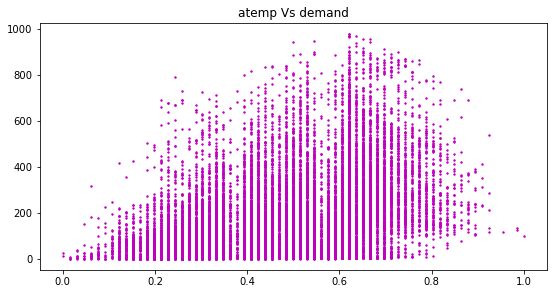

In [60]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('atemp Vs demand')
plt.scatter(df_bikes['atemp'], df_bikes['demand'],s=2,c='m')

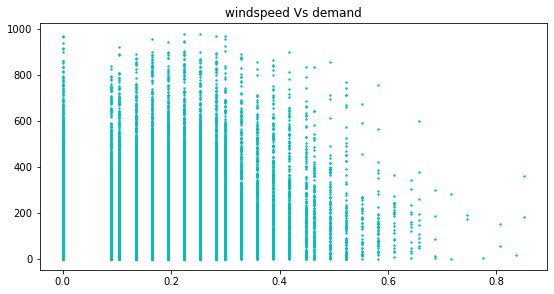

In [61]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('windspeed Vs demand')
plt.scatter(df_bikes['windspeed'], df_bikes['demand'],s=2,c='c')

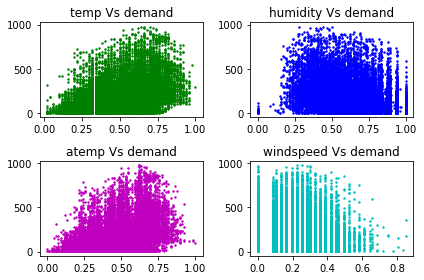

In [62]:

plt.subplot(2,2,1)
plt.title('temp Vs demand')
plt.scatter(df_bikes['temp'], df_bikes['demand'],s=2,c='g')


plt.subplot(2,2,2)
plt.title('humidity Vs demand')
plt.scatter(df_bikes['humidity'], df_bikes['demand'],s=2,c='b')


plt.subplot(2,2,3)
plt.title('atemp Vs demand')
plt.scatter(df_bikes['atemp'], df_bikes['demand'],s=2,c='m')


plt.subplot(2,2,4)
plt.title('windspeed Vs demand')
plt.scatter(df_bikes['windspeed'], df_bikes['demand'],s=2,c='c')

plt.tight_layout()

In [63]:
colors = ['g','r','m','b']

In [64]:
df_bikes

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


<BarContainer object of 4 artists>

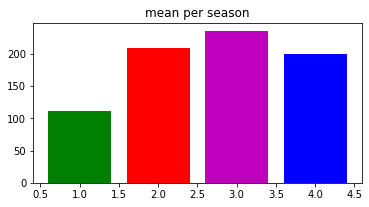

In [73]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
plt.title('mean per season')
cat_list = df_bikes['season'].unique()
cat_avg = df_bikes.groupby('season').mean()['demand']

plt.bar(cat_list, cat_avg,color=colors)

<BarContainer object of 24 artists>

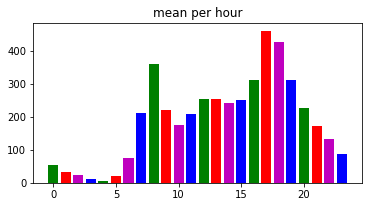

In [74]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
plt.title('mean per hour')
cat_list = df_bikes['hour'].unique()
cat_avg = df_bikes.groupby('hour').mean()['demand']

plt.bar(cat_list, cat_avg,color=colors)

## <span style='color:#2E8BC0'> 3| Check Outlaiers </span>

In [80]:
df_bikes['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [81]:
df_bikes['demand'].quantile([0.5,0.15,0.5,0.95,0.99])

0.50    142.00
0.15     16.00
0.50    142.00
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

## <span style='color:#2E8BC0'> 4| Correlation </span>

In [82]:
correlation = df_bikes[['temp','atemp','humidity','windspeed','demand']].corr()

In [83]:
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


### Drop Irrelevent Features

In [84]:
df_bikes = df_bikes.drop(['weekday','workingday','year','atemp','windspeed'],axis=1)
df_bikes

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,119
17375,1,12,20,0,2,0.26,0.60,89
17376,1,12,21,0,1,0.26,0.60,90
17377,1,12,22,0,1,0.26,0.56,61


### Auto Correlation of demand

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474696, 0.47049534, 0.4962279 , 0.49404034, 0.46795914,
        0.4773202 , 0.5267575 , 0.5914572 , 0.65201545, 0.7151952 ,
        0.8059098 , 0.92530924, 1.        , 0.92530924, 0.8059098 ,
        0.7151952 , 0.65201545, 0.5914572 , 0.5267575 , 0.4773202 ,
        0.46795914, 0.49404034, 0.4962279 , 0.47049534, 0.45474696],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x14e06391ca0>)

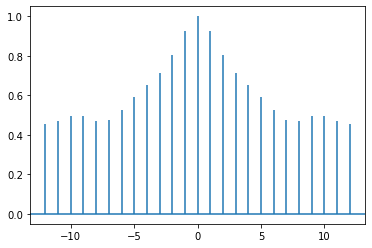

In [85]:
df1 = pd.to_numeric(df_bikes['demand'],downcast='float')
plt.acorr(df1,maxlags=12)

### Log Normalize The Features demand

In [86]:
df1 = df_bikes['demand']
df2 = np.log(df1)

<AxesSubplot:>

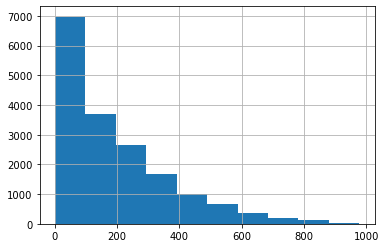

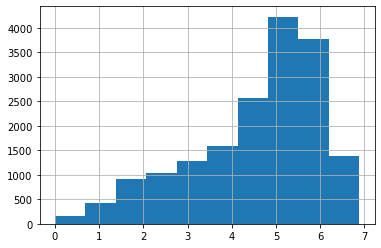

In [87]:
plt.figure()
df1.hist()

plt.figure()
df2.hist()

### The Second Shape Is Normal Distribution  is the best

In [88]:
df_bikes['demand'] = np.log(df_bikes['demand'])

In [105]:
t_1 = df_bikes['demand'].shift(+1).to_frame()
t_1.columns= ['t_1']

t_2 = df_bikes['demand'].shift(+2).to_frame()
t_2.columns= ['t_2']


t_3 = df_bikes['demand'].shift(+3).to_frame()
t_3.columns= ['t_3']

df_bikes_lag = pd.concat([df_bikes, t_1,t_2,t_3], axis=1)

In [106]:
df_bikes_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t_1,t_2,t_3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [107]:
df_bikes_lag = df_bikes_lag.dropna()

In [108]:
df_bikes_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t_1,t_2,t_3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [109]:
df_bikes_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t_1         float64
t_2         float64
t_3         float64
dtype: object

In [110]:
df_bikes_lag['season'] = df_bikes_lag['season'].astype('category')
df_bikes_lag['holiday'] = df_bikes_lag['holiday'].astype('category')
df_bikes_lag['weather'] = df_bikes_lag['weather'].astype('category')
df_bikes_lag['hour'] = df_bikes_lag['hour'].astype('category')
df_bikes_lag['month'] = df_bikes_lag['month'].astype('category')

df_bikes_lag = pd.get_dummies(df_bikes_lag, drop_first=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11424\3196173830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikes_lag['season'] = df_bikes_lag['season'].astype('category')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11424\3196173830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikes_lag['holiday'] = df_bikes_lag['holiday'].astype('category')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11424\3196173830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [111]:
df_bikes_lag

,temp,humidity,demand,t_1,t_2,t_3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## <span style='color:#2E8BC0'> 5| Train & Test Split </span>

In [112]:
Y = df_bikes_lag[['demand']]
X = df_bikes_lag.drop(['demand'],axis=1)

In [113]:
Y

,demand
3,2.564949
4,0.000000
5,0.000000
6,0.693147
7,1.098612
...,...
17374,4.779123
17375,4.488636
17376,4.499810
17377,4.110874


In [114]:
X

,temp,humidity,t_1,t_2,t_3,season_2,season_3,season_4,month_2,month_3,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,3.465736,3.688879,2.772589,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,2.564949,3.465736,3.688879,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,2.564949,3.465736,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.000000,0.000000,2.564949,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,0.693147,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.804021,5.099866,5.365976,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.779123,4.804021,5.099866,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.488636,4.779123,4.804021,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.499810,4.488636,4.779123,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [115]:
tr_size = 0.7*len(X)
tr_size = int(tr_size)

In [116]:
x_train = X.values[0:tr_size]
x_test = X.values[tr_size:len(X)]

In [117]:
y_train = Y.values[0:tr_size]
y_test = Y.values[tr_size:len(Y)]

In [118]:
y_train   ## ==> 70 % of data train

array([[2.56494936],
       [0.        ],
       [0.        ],
       ...,
       [4.91998093],
       [4.35670883],
       [4.11087386]])

In [119]:
y_test ## ==> 30 % of data train

array([[3.58351894],
       [2.39789527],
       [1.94591015],
       ...,
       [4.49980967],
       [4.11087386],
       [3.8918203 ]])

## <span style='color:#2E8BC0'> 6| Fit and Score The Model </span>

In [120]:
from sklearn.linear_model import LinearRegression


In [121]:
std_reg= LinearRegression()


In [122]:
std_reg.fit(x_train,y_train)

LinearRegression()

In [123]:
r2_train = std_reg.score(x_train,y_train)
r2_test = std_reg.score(x_test,y_test)

In [124]:
r2_train

0.9195240591465778

In [125]:
r2_test

0.9287151360253385

In [126]:
Y_predict = std_reg.predict(x_test)

In [127]:
Y_predict

array([[3.21001759],
       [2.86500541],
       [3.21845645],
       ...,
       [4.28217873],
       [4.20477445],
       [3.64981435]])

In [128]:
from sklearn.metrics import mean_squared_error

In [129]:

rmse = math.sqrt(mean_squared_error(y_test,Y_predict))
rmse

0.38098800498170443